---
# **1. Google Drive Connection**
---

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


----
# ***2. About Dataset***
---

`Title:` ***Bank Churn Binary Classification Problem***

`Dataset:` [link](https://www.kaggle.com/competitions/playground-series-s4e1/data)

`Columns Description:`

- *`Customer ID:` A unique identifier for each customer*
- *`Surname:` The customer's surname or last name*
- *`Credit Score:` A numerical value representing the customer's credit score*
- *`Geography:` The country where the customer resides (France, Spain or Germany)*
- *`Gender:` The customer's gender (Male or Female)*
- *`Age:` The customer's age.*
- *`Tenure:` The number of years the customer has been with the bank*
- *`Balance:` The customer's account balance*
- *`NumOfProducts:` The number of bank products the customer uses (e.g., savings account, credit card)*
- *`HasCrCard:` Whether the customer has a credit card (1 = yes, 0 = no)*
- *`IsActiveMember:` Whether the customer is an active member (1 = yes, 0 = no)*
- *`EstimatedSalary:` The estimated salary of the customer*
- *`Exited:` Whether the customer has churned (1 = yes, 0 = no)*

----
# ***3. Importing The Libraries***
---

In [2]:
# import libraries

# 1. to handle the data
import pandas as pd
import numpy as np

# to visualize the dataset
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# To preprocess the data
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
#Model
import tensorflow as tf

#Evaluation
from sklearn.metrics import roc_auc_score

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

----
# ***4. Basic Explorations***
---

> ####  _**4.1 Loading the Dataset**_

In [3]:
# Load test Data
df_test = pd.read_csv("/test.csv")
# Load Train Dataset and show head of Data
#Train Data
df_test = pd.read_csv("/train.csv")

In [4]:
# making a Copy of the Test Data for Future Use
df_test = pd.read_csv("/test.csv")
df_test_ov = df_test.copy()
df_test.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


In [5]:
# For Displaying Maximum Columns
pd.set_option('display.max_columns', None)

> #### ***4.2 Quick Overview***

In [6]:
df_train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [7]:
df_test.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


> #### ***4.2 Shape of Datasets***

In [8]:
# Checking the number of rows and columns
num_train_rows, num_train_columns = df_train.shape
num_test_rows, num_test_columns = df_test.shape

print("Training Data:")
print(f"Number of Rows: {num_train_rows}")
print(f"Number of Columns: {num_train_columns}")
print("=" * 30)
print("Test Data:")
print(f"Number of Rows: {num_test_rows}")
print(f"Number of Columns: {num_test_columns}")

Training Data:
Number of Rows: 165034
Number of Columns: 14
Test Data:
Number of Rows: 110023
Number of Columns: 13


> #### ***4.3 Null Values in Datasets***

In [9]:
# Null Values in Train
train_null = df_train.isnull().sum().sum()

#Null Count in Test
test_null = df_test.isnull().sum().sum()

print(f'Null Count in Train: {train_null}')
print(f'Null Count in Test: {test_null}')

Null Count in Train: 0
Null Count in Test: 0


> #### ***4.4 Duplicates Values in Datasets***

In [10]:
# Count duplicate rows in train_data
train_duplicates = df_train.duplicated().sum()

# Count duplicate rows in test_data
test_duplicates = df_test.duplicated().sum()

# Print the results
print(f"Number of duplicate rows in train dataset: {train_duplicates}")
print(f"Number of duplicate rows in test dataset: {test_duplicates}")

Number of duplicate rows in train dataset: 0
Number of duplicate rows in test dataset: 0


----
# ***5. Exploring the Train Dataset***
---

[Back To Table Of Content](#table-of-content)


> #### ***5.1 Rows and Columns***

In [11]:
# Checking the number of rows and columns
num_train_rows, num_train_columns = df_train.shape

print("Training Data:")
print(f"Number of Rows: {num_train_rows}")
print(f"Number of Columns: {num_train_columns}")

Training Data:
Number of Rows: 165034
Number of Columns: 14


> #### ***5.2 Data Summary***

In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


> **5.2.1 Observation No 1**

- *There are `165034` rows and `14` columns in the dataset.*
- *The columns having `float` datatypes are `5`, `integer` datatype `6`, `object` datatype are `3`*
- *The data does not contain any missing values*
- *The target variable in the dataset is `Exited`.*

----
# ***6. Descriptive Analysis***
---

[Back To The Table Of Content](#table-of-content)



> #### ***6.1 Descriptive View Of data***

In [13]:
df_train.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


> _**6.1.1 Observation No 2**_

| **Category**              | **Description**                                     |
|---------------------------|-----------------------------------------------------|
| **Customer Demographics** | 1. The dataset contains information on 165,034 customers. <br> 2. Customer IDs range from 0 to 165,033. |
| **Credit Score and Age**  | 1. The average credit score is approximately 656.45. <br>2. The average age of customers is around 38.13 years. <br>3. The minimum credit score is 350, and the maximum is 850. |
| **Financial Status**      | 1. Customers typically have a balance of around $55,478.09, with a wide range up to $250,898.09. <br>2. The number of products per customer ranges from 1 to 4. |
| **Bank Services**         | 1. A significant proportion (around 75.4%) of customers have a credit card (HasCrCard). <br>2. Approximately 75.4% of customers are active members (IsActiveMember). |
| **Estimated Salary**      | 1. The estimated salary of customers has a mean of $112,574.82. <br>2. Salaries vary widely, with the minimum at $11.58 and the maximum at $199,992.48. |
| **Customer Churn**        | 1. About 21.2% of customers have exited the bank (Exited = 1). <br>2. The majority (about 78.8%) have not exited the bank (Exited = 0). |
| **Observations**          | 1. The dataset shows a diverse range of customer attributes and behaviors. <br>2. Understanding factors influencing customer churn, such as age, tenure, and product usage, could be crucial for the bank's retention strategies. <br>3. Further analysis and modeling may be required to uncover patterns and make predictions regarding customer churn. |


----
# ***7. Checking The Null And Duplicate Values***
---

[Back To The Table Of Content](#table-of-content)

> #### ***7.1 Null Values Of data***

In [14]:
# Null Values in Train
train_null = df_train.isnull().sum().sum()
print(f'Null Count in Train: {train_null}')

Null Count in Train: 0


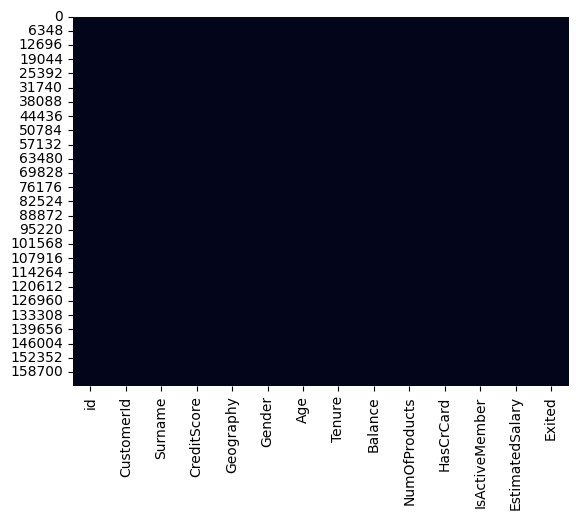

In [15]:
# visual proof
sns.heatmap(df_train.isnull(), cbar=False)
plt.show()

> #### ***7.2 Duplicates Values Of data***

In [16]:
# Count duplicate rows in train_data
train_duplicates = df_train.duplicated().sum()

# Print the results
print(f"Number of duplicate rows in train dataset: {train_duplicates}")

Number of duplicate rows in train dataset: 0


----
# ***8. Lets Visualize the data***
---

In [17]:
sns.set_style("white")
sns.set(rc={"axes.facecolor":"#E8CE9D","figure.facecolor":"#E8CE9D","grid.color":"white"})
sns.set_context("poster",font_scale = .7)

palette = ["#764a23","#f7941d","#6c9a76","#f25a29","#cc4b57"]
palette_cmap = ["#6c9a76","#cc4b57","#764a23","#f25a29","#f7941d"]

[Back To The Table Of Content](#table-of-content)

> ### ***8.1 Gender In The Dataset***

[Back To The Table Of Content](#table-of-content)

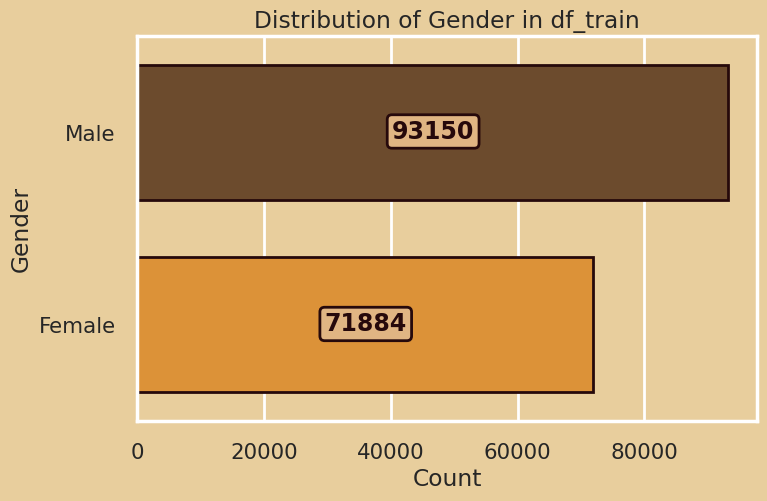

In [18]:
fig = plt.figure(figsize=(8, 5))

p = sns.countplot(y="Gender", data=df_train, palette=palette[0:2], edgecolor='#26090b', linewidth=2, width=0.7)

# Add text on top of the bars
for container in p.containers:
    plt.bar_label(container, label_type="center", color='#26090b', fontsize=17, weight='bold', padding=6, position=(0.5, 0.5),
                  bbox={"boxstyle": "round", "pad": 0.2, "facecolor": "#e0b583", "edgecolor": '#26090b', "linewidth": 2, "alpha": 1})

plt.title("Distribution of Gender in df_train")
plt.xlabel("Count")
plt.ylabel("Gender")

plt.show()

> ### ***8.2 Geography In The Dataset***

[Back To The Table Of Content](#table-of-content)

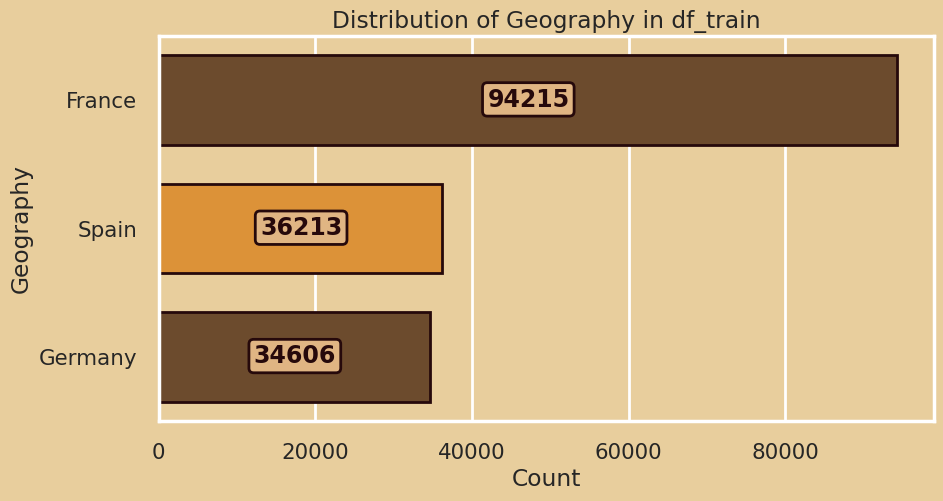

In [19]:
fig = plt.figure(figsize=(10, 5))


p = sns.countplot(y="Geography", data=df_train, palette=palette[0:2], edgecolor='#26090b', linewidth=2, width=0.7)

# Add text on top of the bars
for container in p.containers:
    plt.bar_label(container, label_type="center", color='#26090b', fontsize=17, weight='bold', padding=6, position=(0.5, 0.5),
                  bbox={"boxstyle": "round", "pad": 0.2, "facecolor": "#e0b583", "edgecolor": '#26090b', "linewidth": 2, "alpha": 1})

plt.title("Distribution of Geography in df_train")
plt.xlabel("Count")
plt.ylabel("Geography")

plt.show()


> ### ***8.3 Tenure In The Dataset***

[Back To The Table Of Content](#table-of-content)

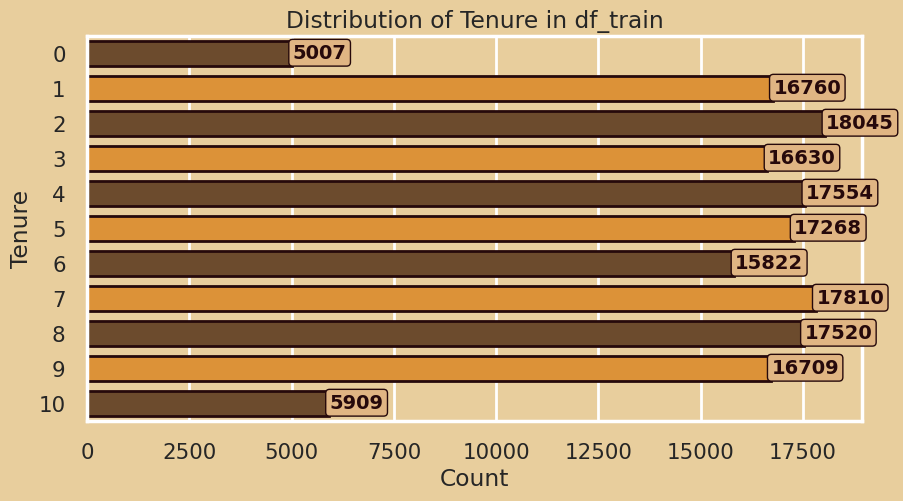

In [20]:
fig = plt.figure(figsize=(10, 5))

p = sns.countplot(y="Tenure", data=df_train, palette=palette[0:2], edgecolor='#26090b', linewidth=2, width=0.7)

# Add text on top of the bars
for container in p.containers:
    plt.bar_label(container, label_type="edge", color='#26090b', fontsize=14, weight='bold', padding=6, position=(0.5, 0.5),
                  bbox={"boxstyle": "round", "pad": 0.2, "facecolor": "#e0b583", "edgecolor": '#26090b', "linewidth": 1, "alpha": 1})

plt.title("Distribution of Tenure in df_train")
plt.xlabel("Count")
plt.ylabel("Tenure")

plt.show()

> ### ***8.4 Number Of Products In The Dataset***

[Back To The Table Of Content](#table-of-content)

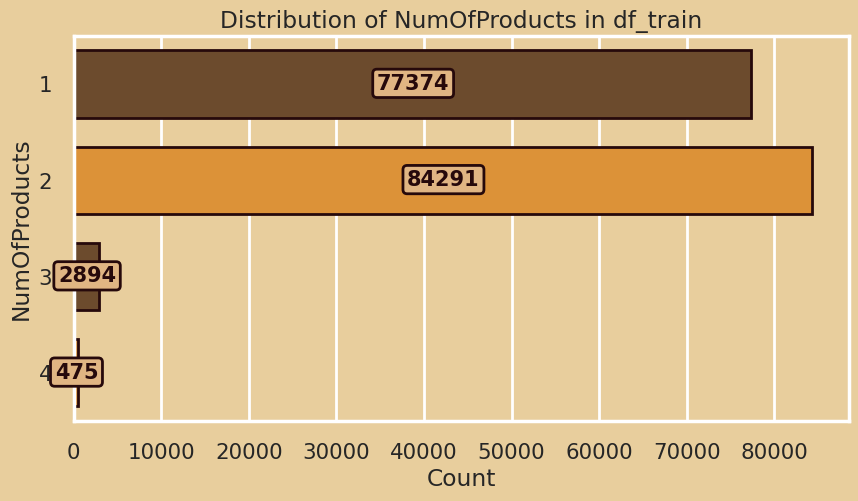

In [21]:
fig = plt.figure(figsize=(10, 5))

p = sns.countplot(y="NumOfProducts", data=df_train, palette=palette[0:2]
                  , edgecolor='#26090b', linewidth=2, width=0.7)

# Add text on top of the bars
for container in p.containers:
    plt.bar_label(container, label_type="center", color='#26090b', fontsize=15, weight='bold', padding=6, position=(0.5, 0.5),
                  bbox={"boxstyle": "round", "pad": 0.2, "facecolor": "#e0b583", "edgecolor": '#26090b', "linewidth": 2, "alpha": 1})

plt.title("Distribution of NumOfProducts in df_train")
plt.xlabel("Count")
plt.ylabel("NumOfProducts")

plt.show()


> ### ***8.5 Customer Having Credit Card In The Dataset***

[Back To The Table Of Content](#table-of-content)

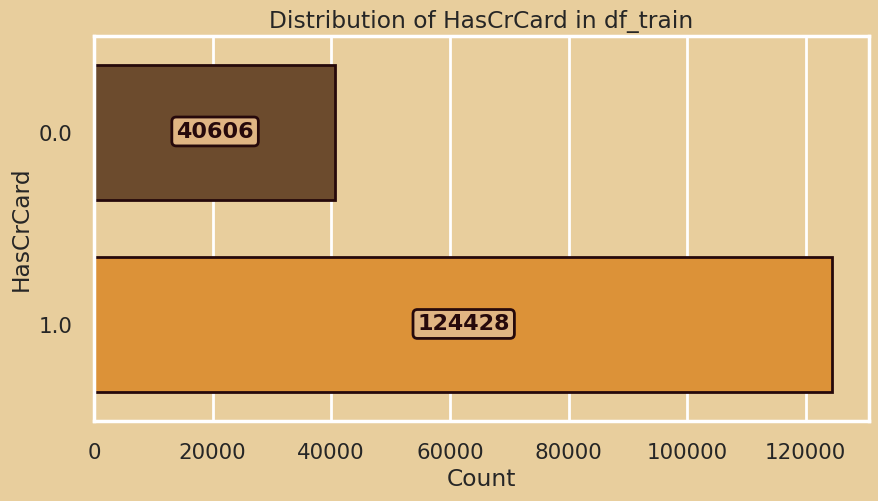

In [22]:
fig = plt.figure(figsize=(10, 5))

p = sns.countplot(y="HasCrCard", data=df_train, palette=palette[0:2]
                  , edgecolor='#26090b', linewidth=2, width=0.7)

# Add text on top of the bars
for container in p.containers:
    plt.bar_label(container, label_type="center", color="#26090b", fontsize=16, weight='bold', padding=6, position=(0.5, 0.5),
                  bbox={"boxstyle": "round", "pad": 0.2, "facecolor": "#e0b583", "edgecolor": '#26090b', "linewidth": 2, "alpha": 1})

plt.title("Distribution of HasCrCard in df_train")
plt.xlabel("Count")
plt.ylabel("HasCrCard")

plt.show()


> ### ***8.6 Active Customers In The Dataset***

[Back To The Table Of Content](#table-of-content)

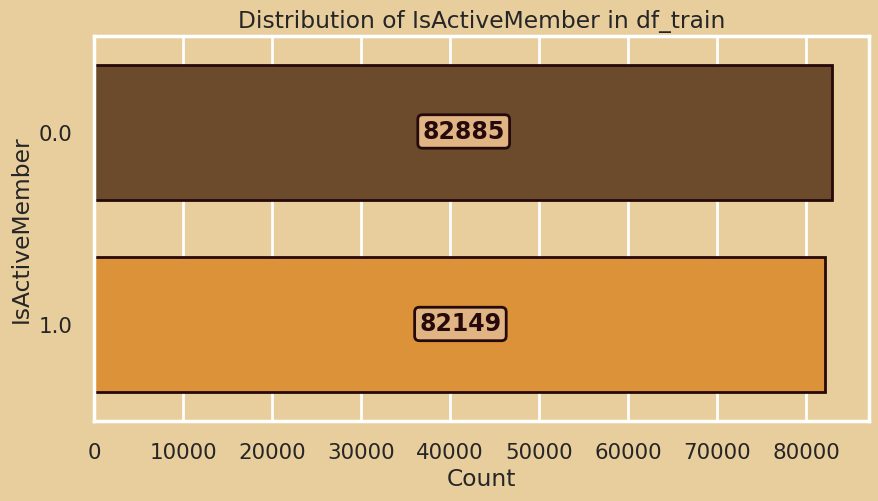

In [23]:
fig = plt.figure(figsize=(10, 5))

p = sns.countplot(y="IsActiveMember", data=df_train, palette=palette[0:2], edgecolor='#26090b', linewidth=2, width=0.7)

# Add text on top of the bars
for container in p.containers:
    plt.bar_label(container, label_type="center", color="#26090b", fontsize=17, weight='bold', padding=6, position=(0.5, 0.5),
                  bbox={"boxstyle": "round", "pad": 0.2, "facecolor": "#e0b583", "edgecolor": '#26090b', "linewidth": 2, "alpha": 1})

plt.title("Distribution of IsActiveMember in df_train")
plt.xlabel("Count")
plt.ylabel("IsActiveMember")

plt.show()


> ### ***8.7 Exited In The Dataset***

[Back To The Table Of Content](#table-of-content)

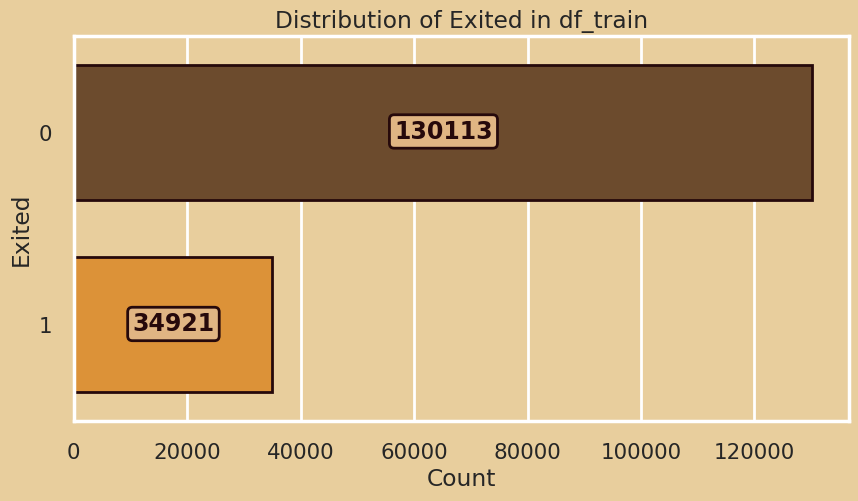

In [24]:
fig = plt.figure(figsize=(10, 5))


p = sns.countplot(y="Exited", data=df_train, palette=palette[0:2], edgecolor='#26090b', linewidth=2, width=0.7)

# Add text on top of the bars
for container in p.containers:
    plt.bar_label(container, label_type="center", color="#26090b", fontsize=17, weight='bold', padding=6, position=(0.5, 0.5),
                  bbox={"boxstyle": "round", "pad": 0.2, "facecolor": "#e0b583", "edgecolor": '#26090b', "linewidth": 2, "alpha": 1})

plt.title("Distribution of Exited in df_train")
plt.xlabel("Count")
plt.ylabel("Exited")

plt.show()


> ### ***8.8 Credit Score In The Dataset***
[Back To The Table Of Content](#table-of-content)

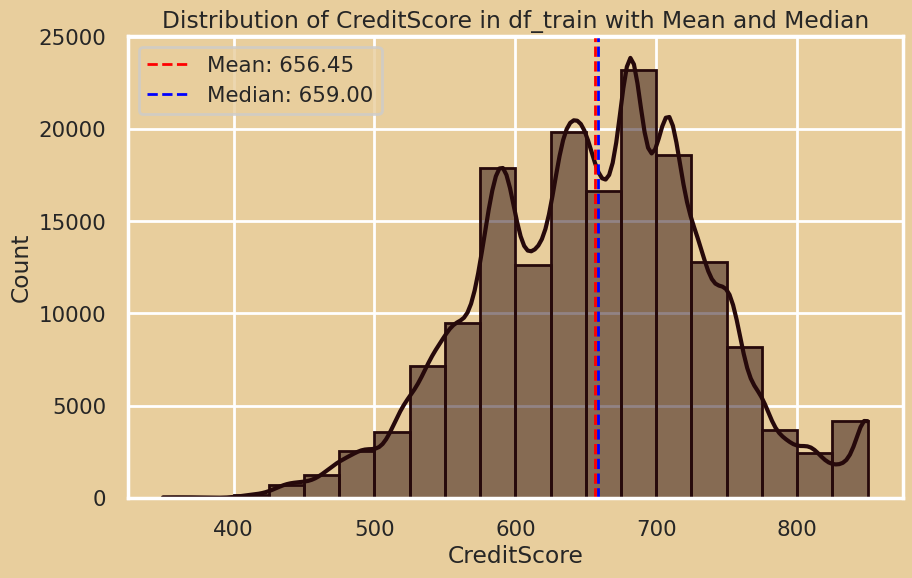

In [25]:
# Create a histogram for the "CreditScore" column with specified colors
fig = plt.figure(figsize=(10, 6))

histplot = sns.histplot(data=df_train, x="CreditScore", bins=20, color='#26090b', edgecolor='#26090b', kde=True)

# Set the color for the kernel density line
histplot.get_lines()[0].set_color('#26090b')

# Calculate mean and median
mean_value = df_train["CreditScore"].mean()
median_value = df_train["CreditScore"].median()

# Add mean and median lines
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')
plt.axvline(median_value, color='blue', linestyle='dashed', linewidth=2, label=f'Median: {median_value:.2f}')

# Set labels and title
plt.title("Distribution of CreditScore in df_train with Mean and Median")
plt.xlabel("CreditScore")
plt.ylabel("Count")

# Show legend
plt.legend()

plt.show()


> ### ***8.9 Age In The Dataset***
[Back To The Table Of Content](#table-of-content)

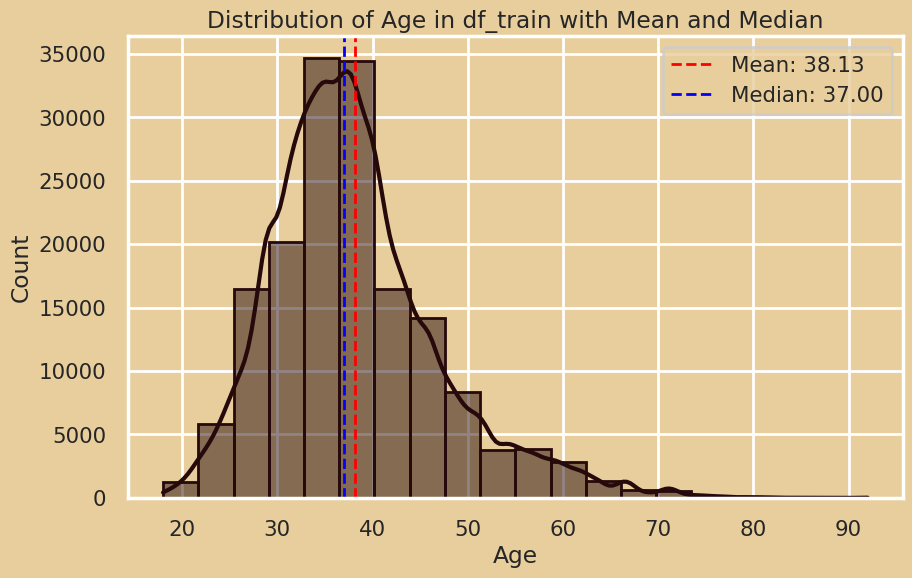

In [26]:
# Create a histogram for the "Age" column with specified colors
fig = plt.figure(figsize=(10, 6))

histplot = sns.histplot(data=df_train, x="Age", bins=20, color='#26090b', edgecolor='#26090b', kde=True)

# Set the color for the kernel density line
histplot.get_lines()[0].set_color('#26090b')

# Calculate mean and median
mean_value = df_train["Age"].mean()
median_value = df_train["Age"].median()

# Add mean and median lines
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')
plt.axvline(median_value, color='blue', linestyle='dashed', linewidth=2, label=f'Median: {median_value:.2f}')

# Set labels and title
plt.title("Distribution of Age in df_train with Mean and Median")
plt.xlabel("Age")
plt.ylabel("Count")

# Show legend
plt.legend()

plt.show()


> ### ***8.10 Balance In The Dataset***
[Back To The Table Of Content](#table-of-content)

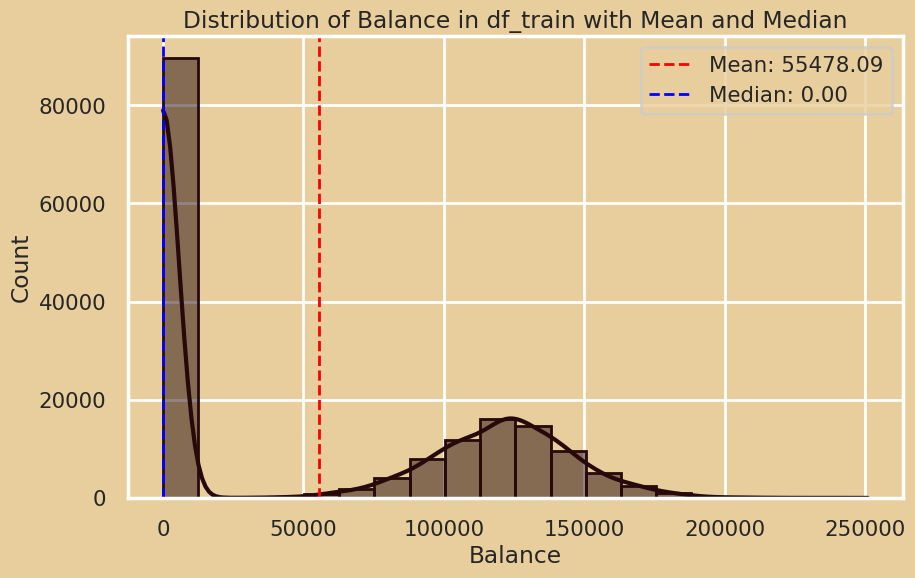

In [27]:
# Create a histogram for the "Balance" column with specified colors
fig= plt.figure(figsize=(10, 6))


histplot = sns.histplot(data=df_train, x="Balance", bins=20, color='#26090b', edgecolor='#26090b', kde=True)

# Set the color for the kernel density line
histplot.get_lines()[0].set_color('#26090b')

# Calculate mean and median
mean_value = df_train["Balance"].mean()
median_value = df_train["Balance"].median()

# Add mean and median lines
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')
plt.axvline(median_value, color='blue', linestyle='dashed', linewidth=2, label=f'Median: {median_value:.2f}')

# Set labels and title
plt.title("Distribution of Balance in df_train with Mean and Median")
plt.xlabel("Balance")
plt.ylabel("Count")

# Show legend
plt.legend()

plt.show()

> ### ***8.11 Estimated Salary In The Dataset***
[Back To The Table Of Content](#table-of-content)

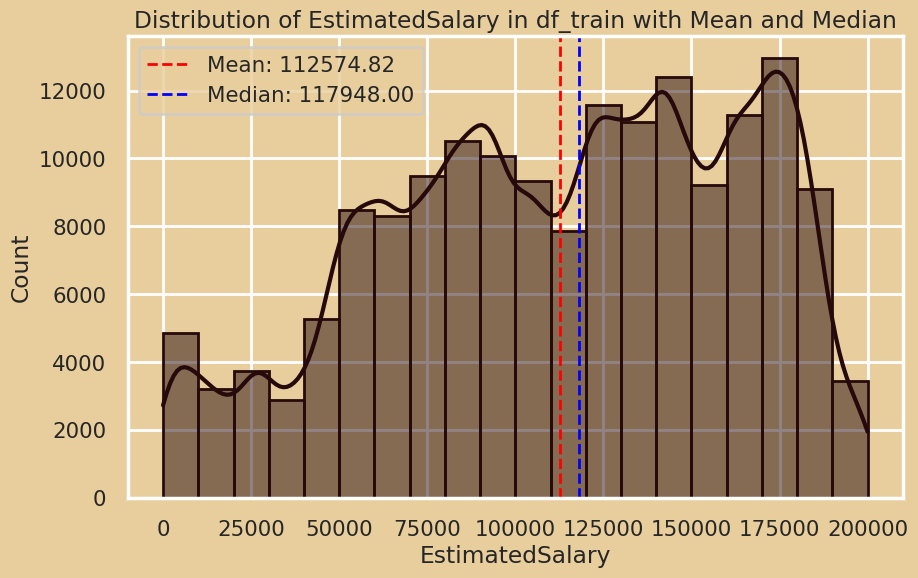

In [28]:
# Create a histogram for the "EstimatedSalary" column with specified colors
fig = plt.figure(figsize=(10, 6))


histplot = sns.histplot(data=df_train, x="EstimatedSalary", bins=20, color='#26090b', edgecolor='#26090b', kde=True)

# Set the color for the kernel density line
histplot.get_lines()[0].set_color('#26090b')

# Calculate mean and median
mean_value = df_train["EstimatedSalary"].mean()
median_value = df_train["EstimatedSalary"].median()

# Add mean and median lines
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')
plt.axvline(median_value, color='blue', linestyle='dashed', linewidth=2, label=f'Median: {median_value:.2f}')

# Set labels and title
plt.title("Distribution of EstimatedSalary in df_train with Mean and Median")
plt.xlabel("EstimatedSalary")
plt.ylabel("Count")

# Show legend
plt.legend()

plt.show()

> ### ***8.12 Countplot by Target***
[Back To The Table Of Content](#table-of-content)

In [29]:
cat_cols = ['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember']

num_cols = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

target = 'Exited'

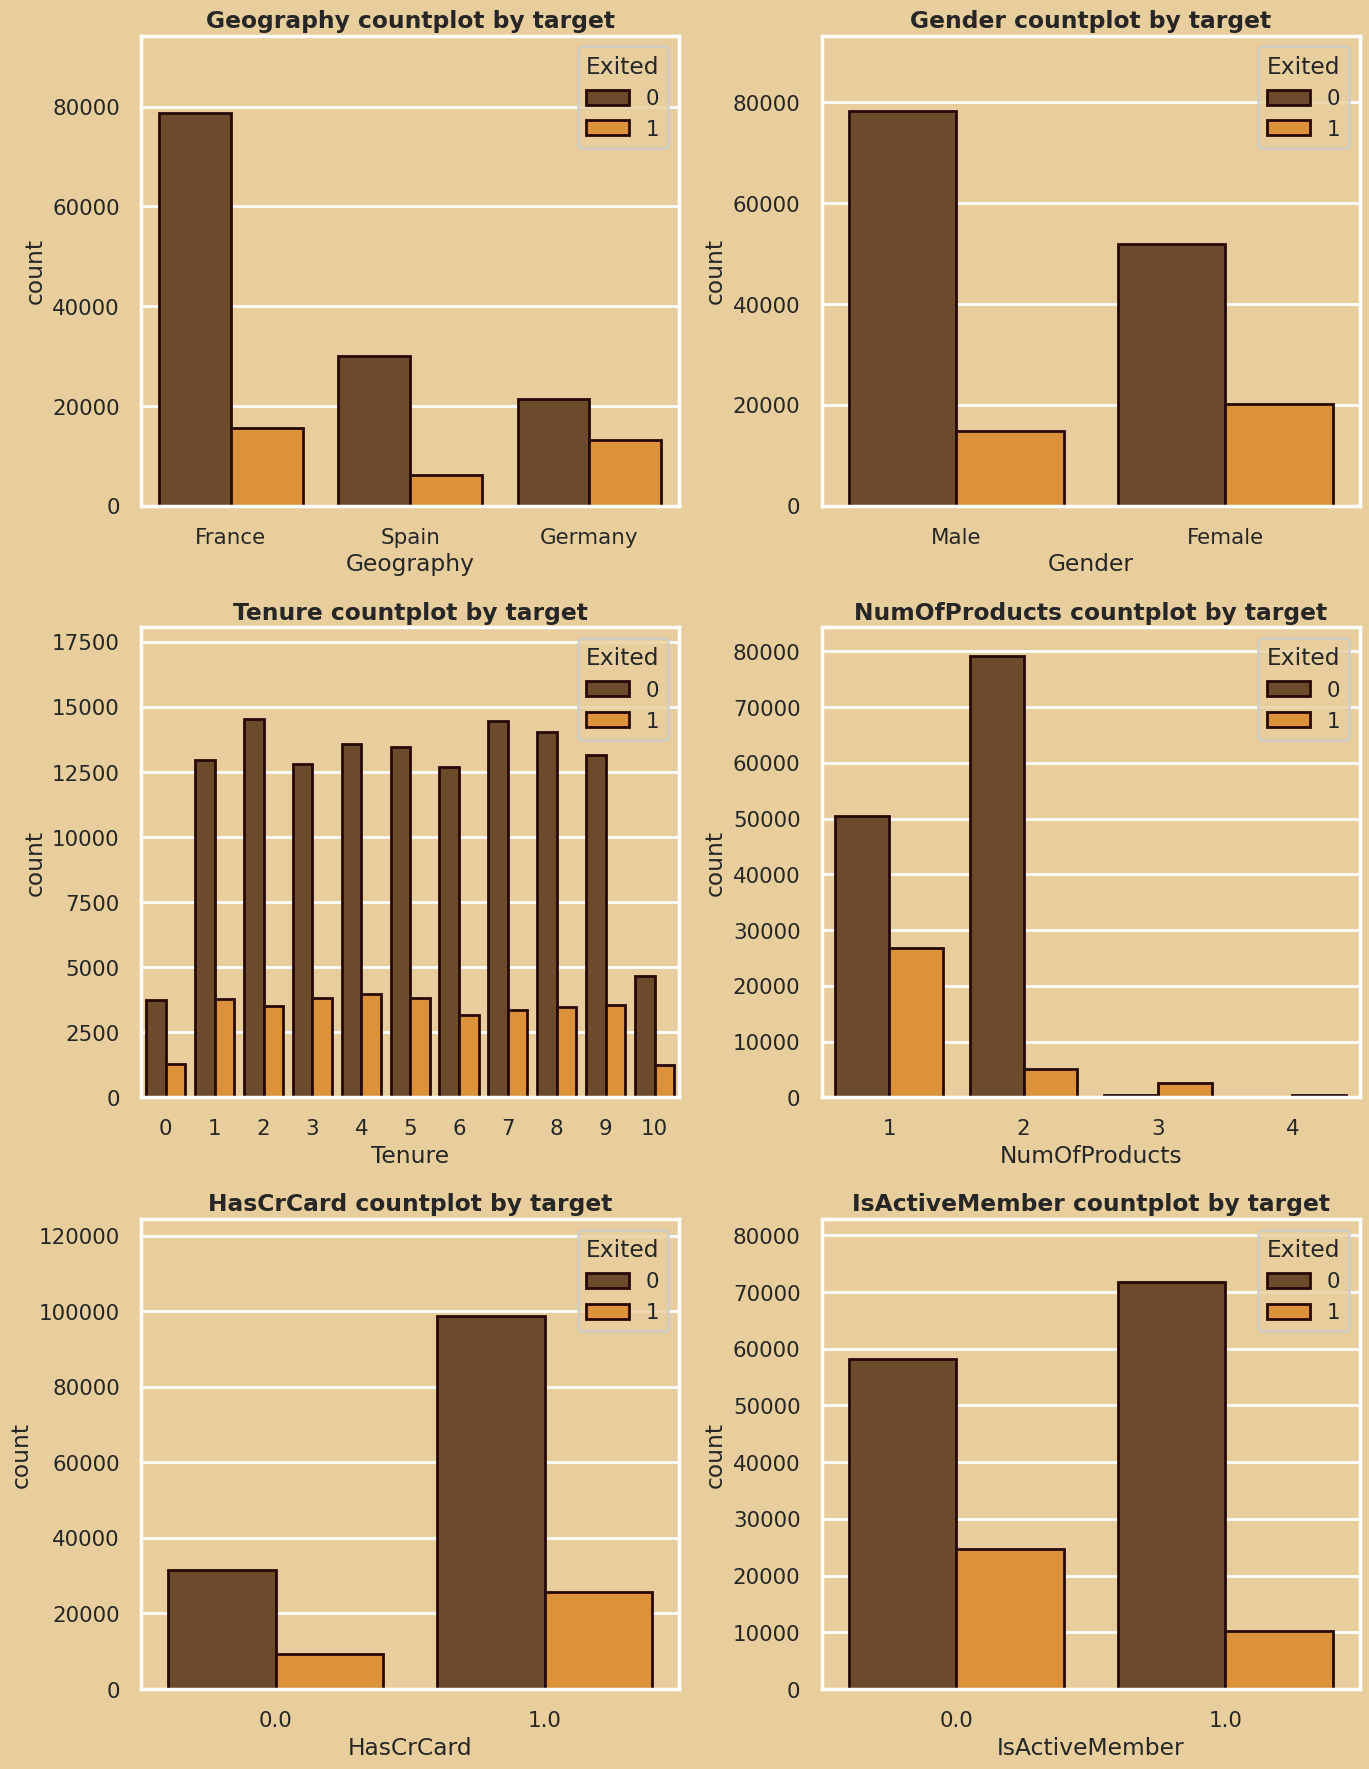

In [30]:
fig = plt.figure(figsize=(14, len(cat_cols)*3))

# background_color = 'grey'
for i, col in enumerate(cat_cols):

    plt.subplot(len(cat_cols)//2 + len(cat_cols) % 2, 2, i+1)
    sns.countplot(x=col, hue=target, data=df_train, palette=palette[0:2], color='#26090b', edgecolor='#26090b')
    plt.title(f"{col} countplot by target", fontweight = 'bold')
    plt.ylim(0, df_train[col].value_counts().max() + 10)

plt.tight_layout()
plt.show()

---

# ***9. Dealing with Outliers***
---

[Back To The Table Of Content](#table-of-content)

In [31]:
num_cols = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

# Create subplots with two rows and two columns
fig = make_subplots(rows=2, cols=2)

# Background color
fig.update_layout(
    plot_bgcolor="#764a23",  # Set background color for the entire plot area
    paper_bgcolor="#E8CE9D",  # Set background color for the outer area
)

# Loop through numerical columns and add boxplots with color
for i, col in enumerate(num_cols, start=1):
    row_num = 1 if i <= 2 else 2
    col_num = i if i <= 2 else i - 2
    fig.add_trace(
        go.Box(
            x=df_train[col],
            name=col,
            marker_color='#26090b',  # Set box color
            line_color='#26090b'  # Set mean line color
        ),
        row=row_num,
        col=col_num
    )

# Update layout
fig.update_layout(
    title_text="Boxplots of Numerical Columns",
    showlegend=False
)

fig.show()

Output hidden; open in https://colab.research.google.com to view.


---
# ***10. Preprocess Data***
---
[Back To The Table Of Content](#table-of-content)

In [32]:
# Load Train Dataset and show head of Data
#Train Data
df_test = pd.read_csv("/train.csv")
df_train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


> ### ***10.1 Correlation Matrix***
[Back To The Table Of Content](#table-of-content)

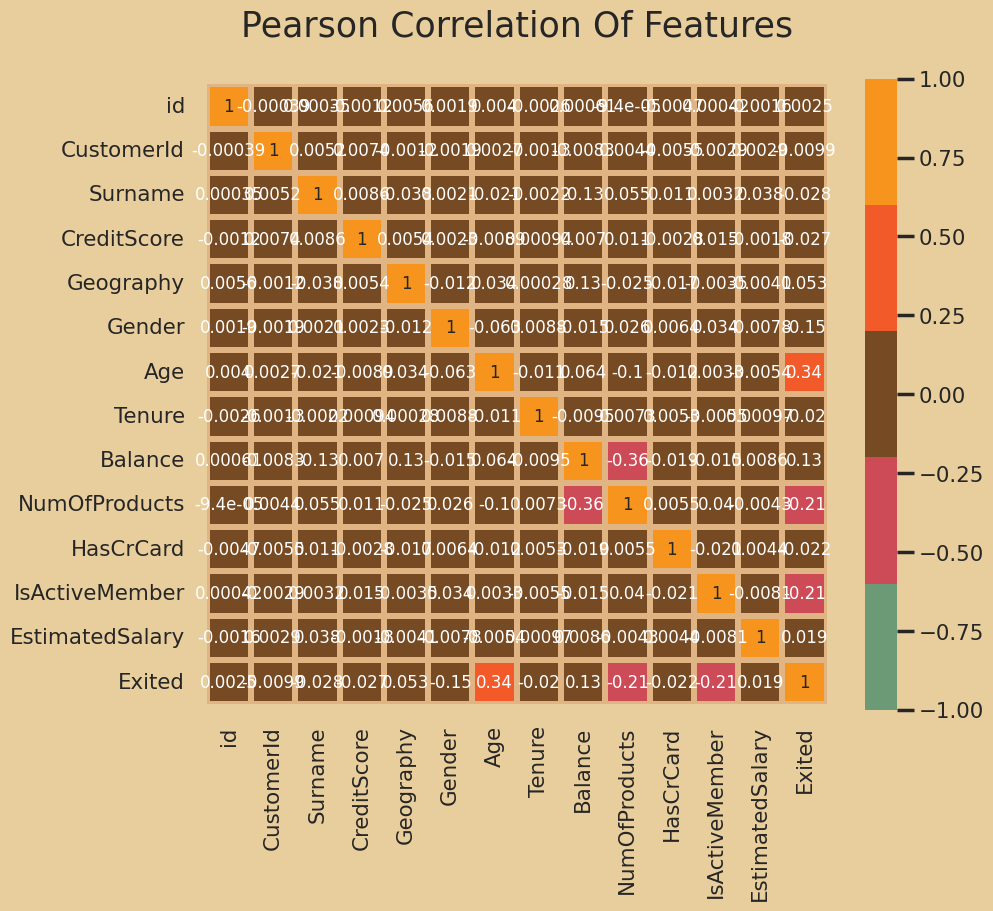

In [33]:
# Checking Corr Matrix
# Making New Data Frame .
df_corr = df_train.copy()

catcol = [col for col in df_corr.columns if df_corr[col].dtype == "object"]
le = LabelEncoder()
for col in catcol:
        df_corr[col] = le.fit_transform(df_corr[col])


plt.subplots(figsize =(10, 10))

sns.heatmap(df_corr.corr(), cmap = palette_cmap, square=True, cbar_kws=dict(shrink =.82),
            annot=True, vmin=-1, vmax=1, linewidths=3,linecolor='#e0b583',annot_kws=dict(fontsize =12))
plt.title("Pearson Correlation Of Features\n", fontsize=25)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

> ### ***10.2 Numeric Feature Distribution***
[Back To The Table Of Content](#table-of-content)

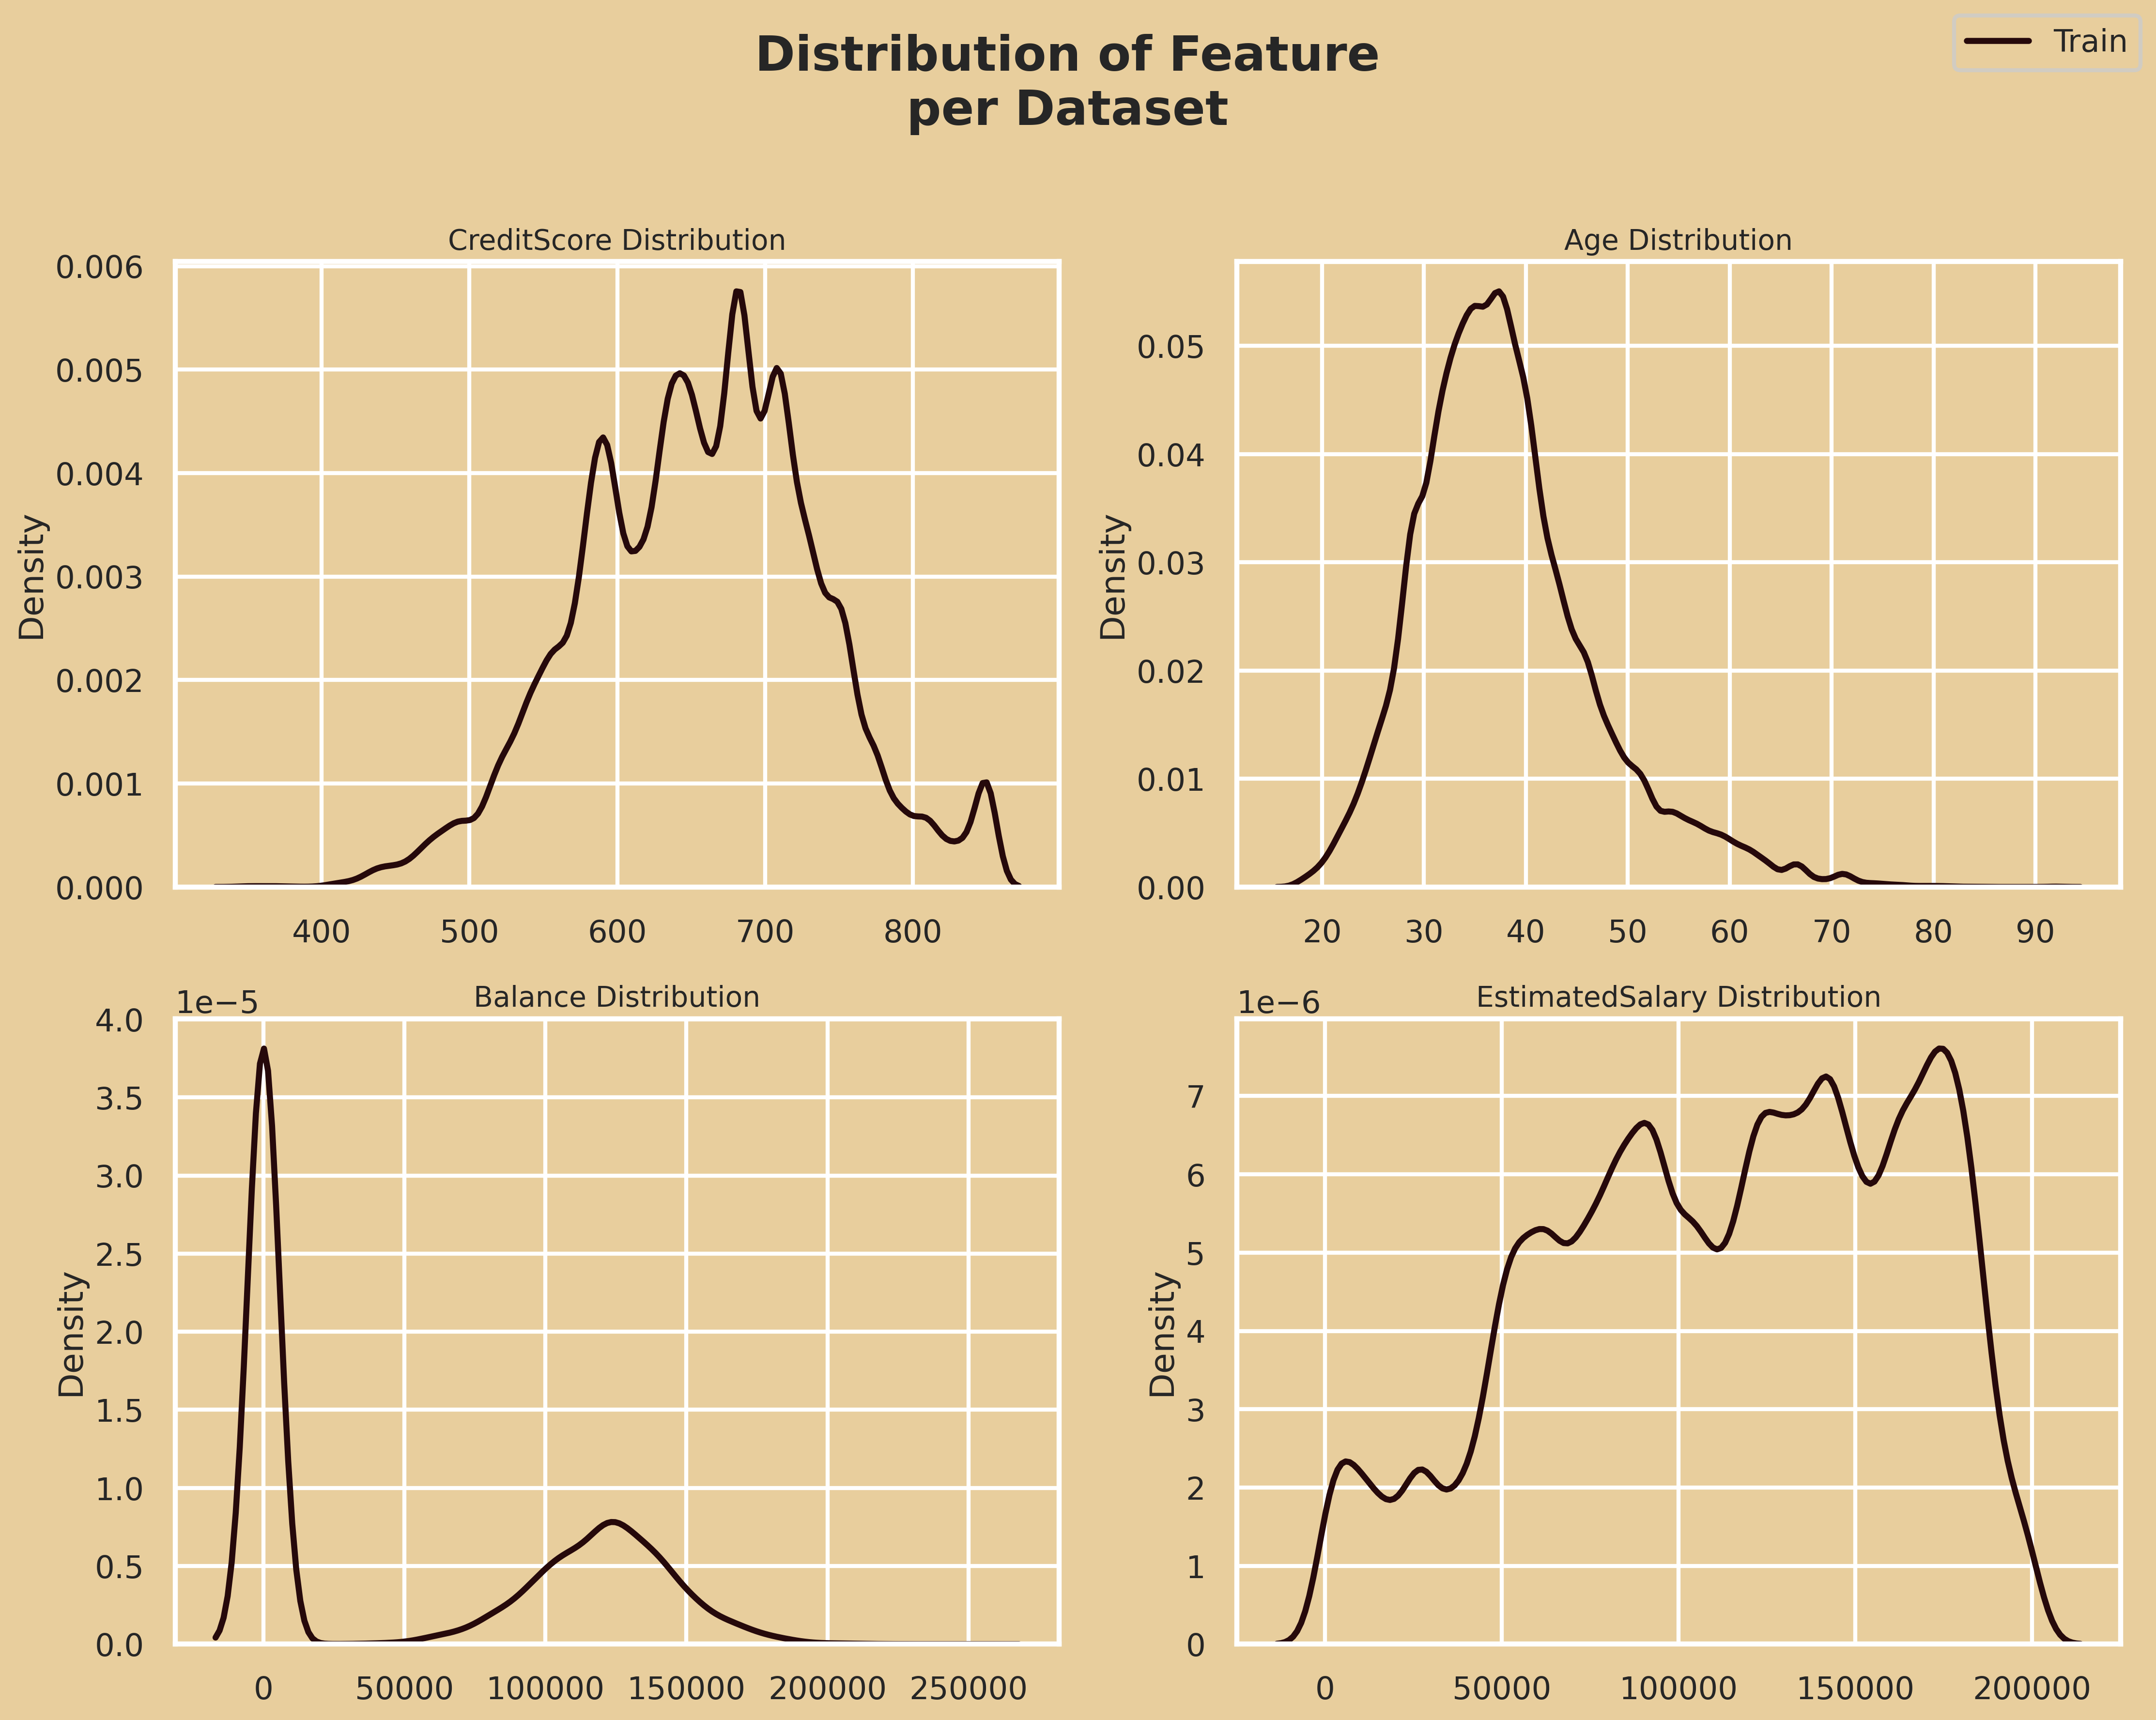

In [34]:
fig, ax = plt.subplots(2, 2, figsize = (15, 12), dpi = 300)
ax = ax.flatten()

numerical_variables = ['CreditScore','Age', 'Balance','EstimatedSalary' ]
for i, column in enumerate(numerical_variables):
    sns.kdeplot(df_train[column], ax=ax[i], palette=palette[0:2], color = '#26090b')
    ax[i].set_title(f'{column} Distribution', size = 14)
    ax[i].set_xlabel(None)

fig.suptitle('Distribution of Feature\nper Dataset\n', fontsize = 24, fontweight = 'bold')
fig.legend(['Train'])
plt.tight_layout()


---
# ***11. Model Building***
---
[Back To The Table Of Content](#table-of-content)

> ### ***11.1 Scaling Of Numeric Features***
[Back To The Table Of Content](#table-of-content)

In [35]:
numeirc_cols = ['Age','CreditScore', 'Balance','EstimatedSalary']
#Use Loop Function
for col in numeirc_cols:
    sc = MinMaxScaler()
    df_train[col+"_scaled"] = sc.fit_transform(df_train[[col]])
    df_test[col+"_scaled"] = sc.fit_transform(df_test[[col]])

[Back To The Table Of Content](#table-of-content)
> ### ***11.2 TF-IDF Vectorization for Surname***


In [36]:
# Combining Customerid , Surname , Geography , and Gender , Estimated Slaray  and Making New Column in both Data Frames
df_train['Sur_Geo_Gend_Sal'] = df_train['CustomerId'].astype('str')+df_train['Surname']+df_train['Geography']+df_train['Gender']+np.round(df_train.EstimatedSalary).astype('str')
df_test['Sur_Geo_Gend_Sal'] = df_test['CustomerId'].astype('str')+df_test['Surname']+df_test['Geography']+df_test['Gender']+np.round(df_test.EstimatedSalary).astype('str')

**The `get_vectors` function takes two DataFrames (`df_train` and `df_test`), and a specified column name (`col_name`). It performs the following steps:*

1. *Utilizes the `TfidfVectorizer` to transform the text data in the specified column into TF-IDF vectors, limiting the features to a maximum of 1000.*

2. *Applies dimensionality reduction using `TruncatedSVD` with 3 components to further transform the TF-IDF vectors.*

3. *Converts the transformed vectors into DataFrames (`tfidf_df_train` and `tfidf_df_test`).*

4. *Names the columns in the new DataFrames with a combination of the original column name and additional information.*

5. *Resets the index of the original DataFrames before concatenation.*

6. *Concatenates the transformed features with the original data along the columns.*

7. *Returns the modified training and testing DataFrames.*

*This function effectively combines TF-IDF vectorization and dimensionality reduction to enhance the original DataFrames with transformed features, facilitating machine learning tasks that involve text data.*

**The TF-IDF matrix can be high-dimensional, and TfidfVectorizer helps reduce this dimensionality, making it computationally more efficient and often improving model performance.*


In [37]:
def get_vectors(df_train,df_test,col_name):

    vectorizer = TfidfVectorizer(max_features=1000)
    vectors_train = vectorizer.fit_transform(df_train[col_name])
    vectors_test = vectorizer.transform(df_test[col_name])

    #Dimensionality Reduction Using SVD ( Singular Value Decompostion)
    svd = TruncatedSVD(3)
    x_sv_train = svd.fit_transform(vectors_train)
    x_sv_test = svd.transform(vectors_test)

    # Convert to DataFrames
    tfidf_df_train = pd.DataFrame(x_sv_train)
    tfidf_df_test = pd.DataFrame(x_sv_test)

    # Naming columns in the new DataFrames
    cols = [(col_name + "_tfidf_" + str(f)) for f in tfidf_df_train.columns.to_list()]
    tfidf_df_train.columns = cols
    tfidf_df_test.columns = cols

    # Reset the index of the DataFrames before concatenation
    df_train = df_train.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    # Concatenate transformed features with original data
    df_train = pd.concat([df_train, tfidf_df_train], axis="columns")
    df_test = pd.concat([df_test, tfidf_df_test], axis="columns")
    return df_train,df_test

In [38]:
df_train,df_test = get_vectors(df_train,df_test,'Surname')
df_train,df_test = get_vectors(df_train,df_test,'Sur_Geo_Gend_Sal')

In [39]:
# Head Of Train after Vectorization
df_train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_scaled,CreditScore_scaled,Balance_scaled,EstimatedSalary_scaled,Sur_Geo_Gend_Sal,Surname_tfidf_0,Surname_tfidf_1,Surname_tfidf_2,Sur_Geo_Gend_Sal_tfidf_0,Sur_Geo_Gend_Sal_tfidf_1,Sur_Geo_Gend_Sal_tfidf_2
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0,0.202703,0.636,0.000000,0.907279,15674932OkwudilichukwuFranceMale181450.0,-2.328944e-07,1.326782e-08,1.528040e-07,0.0,0.0,0.0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0,0.202703,0.554,0.000000,0.247483,15749177OkwudiliolisaFranceMale49504.0,-2.789677e-07,9.908110e-07,1.058544e-07,0.0,0.0,0.0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0,0.297297,0.656,0.000000,0.924364,15694510HsuehFranceMale184867.0,1.727838e-03,5.018156e-03,-2.087275e-03,0.0,0.0,0.0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0,0.216216,0.462,0.593398,0.422787,15741417KaoFranceMale84561.0,1.324829e-03,6.010124e-04,1.616668e-03,0.0,0.0,0.0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0,0.202703,0.732,0.000000,0.075293,15766172ChiemenamSpainMale15069.0,1.736600e-07,2.720706e-07,-3.205656e-08,0.0,0.0,0.0


> ### ***11.3 Feature Engineering***
[Back To The Table Of Content](#table-of-content)

*The `getFeats` function enhances a given DataFrame by creating new features based on existing ones. Here's a concise summary of the code:*

1. ***Senior:** Adds a binary column indicating whether a person is a senior (age 60 or above).*

2. ***Active_by_CreditCard:** Multiplies the binary columns 'HasCrCard' and 'IsActiveMember' to create a new feature.*

3. ***Products_Per_Tenure:** Calculates the ratio of 'Tenure' to 'NumOfProducts' and creates a new column.*

4. ***AgeCat:** Divides ages by 20, rounds the result, and converts it to a categorical variable.*

5. ***One-Hot Encoding:** Converts categorical columns ('Geography', 'Gender', 'NumOfProducts', and 'AgeCat') into dummy variables using one-hot encoding.*

*The function then returns the modified DataFrame with these additional features.*

In [40]:
def feature_data(df):

    df['Senior'] = df['Age'].apply(lambda x: 1 if x >= 60 else 0)
    df['Active_by_CreditCard'] = df['HasCrCard'] * df['IsActiveMember']
    df['Products_Per_Tenure'] =  df['Tenure'] / df['NumOfProducts']
    df['AgeCat'] = np.round(df.Age/20).astype('int').astype('category')

    cat_cols = ['Geography', 'Gender', 'NumOfProducts','AgeCat']
    #onehotEncoding
    df=pd.get_dummies(df,columns=cat_cols)
    return df

In [41]:
#Genrating New Features
df_train = feature_data(df_train)
df_test = feature_data(df_test)

##Selecting Columns FOr use
feat_cols=df_train.columns.drop(['id', 'CustomerId', 'Surname','Exited','Sur_Geo_Gend_Sal'])
feat_cols=feat_cols.drop(numeirc_cols)

#Printing
print(feat_cols)
df_train.head()

Index(['Tenure', 'HasCrCard', 'IsActiveMember', 'Age_scaled',
       'CreditScore_scaled', 'Balance_scaled', 'EstimatedSalary_scaled',
       'Surname_tfidf_0', 'Surname_tfidf_1', 'Surname_tfidf_2',
       'Sur_Geo_Gend_Sal_tfidf_0', 'Sur_Geo_Gend_Sal_tfidf_1',
       'Sur_Geo_Gend_Sal_tfidf_2', 'Senior', 'Active_by_CreditCard',
       'Products_Per_Tenure', 'Geography_France', 'Geography_Germany',
       'Geography_Spain', 'Gender_Female', 'Gender_Male', 'NumOfProducts_1',
       'NumOfProducts_2', 'NumOfProducts_3', 'NumOfProducts_4', 'AgeCat_1',
       'AgeCat_2', 'AgeCat_3', 'AgeCat_4', 'AgeCat_5'],
      dtype='object')


,id,CustomerId,Surname,CreditScore,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_scaled,CreditScore_scaled,Balance_scaled,EstimatedSalary_scaled,Sur_Geo_Gend_Sal,Surname_tfidf_0,Surname_tfidf_1,Surname_tfidf_2,Sur_Geo_Gend_Sal_tfidf_0,Sur_Geo_Gend_Sal_tfidf_1,Sur_Geo_Gend_Sal_tfidf_2,Senior,Active_by_CreditCard,Products_Per_Tenure,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,AgeCat_1,AgeCat_2,AgeCat_3,AgeCat_4,AgeCat_5
0,0,15674932,Okwudilichukwu,668,33.0,3,0.00,1.0,0.0,181449.97,0,0.202703,0.636,0.000000,0.907279,15674932OkwudilichukwuFranceMale181450.0,-2.328944e-07,1.326782e-08,1.528040e-07,0.0,0.0,0.0,0,0.0,1.5,True,False,False,False,True,False,True,False,False,False,True,False,False,False
1,1,15749177,Okwudiliolisa,627,33.0,1,0.00,1.0,1.0,49503.50,0,0.202703,0.554,0.000000,0.247483,15749177OkwudiliolisaFranceMale49504.0,-2.789677e-07,9.908110e-07,1.058544e-07,0.0,0.0,0.0,0,1.0,0.5,True,False,False,False,True,False,True,False,False,False,True,False,False,False
2,2,15694510,Hsueh,678,40.0,10,0.00,1.0,0.0,184866.69,0,0.297297,0.656,0.000000,0.924364,15694510HsuehFranceMale184867.0,1.727838e-03,5.018156e-03,-2.087275e-03,0.0,0.0,0.0,0,0.0,5.0,True,False,False,False,True,False,True,False,False,False,True,False,False,False
3,3,15741417,Kao,581,34.0,2,148882.54,1.0,1.0,84560.88,0,0.216216,0.462,0.593398,0.422787,15741417KaoFranceMale84561.0,1.324829e-03,6.010124e-04,1.616668e-03,0.0,0.0,0.0,0,1.0,2.0,True,False,False,False,True,True,False,False,False,False,True,False,False,False
4,4,15766172,Chiemenam,716,33.0,5,0.00,1.0,1.0,15068.83,0,0.202703,0.732,0.000000,0.075293,15766172ChiemenamSpainMale15069.0,1.736600e-07,2.720706e-07,-3.205656e-08,0.0,0.0,0.0,0,1.0,2.5,False,False,True,False,True,False,True,False,False,False,True,False,False,False


> ### ***11.4 X and y***
[Back To The Table Of Content](#table-of-content)

In [42]:
X=df_train[feat_cols]
y=df_train['Exited']

In [43]:
print(f'The Shape Of X is {X.shape}')

The Shape Of X is (165034, 30)


In [44]:
X = X.astype(np.float32)
y = y.astype(np.float32)

## 11.5 Neural Network

In [46]:
# Set random seed
tf.random.set_seed(42)

# Create model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dense(15, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

# Compile model
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=[tf.keras.metrics.AUC()]
)

# Train model
history = model.fit(X, y, epochs=15)

Epoch 1/10
5158/5158 [==============================] - 22s 3ms/step - loss: 0.3449 - auc: 0.8691
Epoch 2/10
5158/5158 [==============================] - 19s 4ms/step - loss: 0.3339 - auc: 0.8785
Epoch 3/10
5158/5158 [==============================] - 18s 4ms/step - loss: 0.3315 - auc: 0.8802
Epoch 4/10
5158/5158 [==============================] - 18s 3ms/step - loss: 0.3300 - auc: 0.8814
Epoch 5/10
5158/5158 [==============================] - 19s 4ms/step - loss: 0.3290 - auc: 0.8821
Epoch 6/10
5158/5158 [==============================] - 26s 5ms/step - loss: 0.3282 - auc: 0.8830
Epoch 7/10
5158/5158 [==============================] - 33s 6ms/step - loss: 0.3286 - auc: 0.8825
Epoch 8/10
5158/5158 [==============================] - 18s 4ms/step - loss: 0.3280 - auc: 0.8830
Epoch 9/10
5158/5158 [==============================] - 18s 3ms/step - loss: 0.3273 - auc: 0.8833
Epoch 10/10
5158/5158 [==============================] - 19s 4ms/step - loss: 0.3278 - auc: 0.8831


In [54]:
df_test.drop(["CreditScore", "Age", "Balance"], axis=1, inplace=True)
df_test.drop("EstimatedSalary", axis=1, inplace=True)
df_test.drop(['id', 'CustomerId', 'Surname', 'Sur_Geo_Gend_Sal'], axis=1, inplace=True)

In [55]:
df_test = df_test.astype(np.float32)
model.evaluate(df_test)

3439/3439 [==============================] - 9s 3ms/step - loss: 0.0000e+00 - auc: 0.0000e+00


[0.0, 0.0]

In [56]:
threshold = 0.5
y_probs = model.predict(df_test)
y_preds = tf.cast(y_probs >= threshold, tf.int32)
y_preds

3439/3439 [==============================] - 6s 2ms/step


<tf.Tensor: shape=(110023, 1), dtype=int32, numpy=
array([[0],
       [1],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int32)>

In [59]:
df_test = pd.read_csv("/test.csv")
y_preds = tf.squeeze(y_preds)
df_final = pd.DataFrame({
    'CustomerId': df_test['CustomerId'],
    'Predictions': y_preds
})

In [61]:
df_final.head()

Previsoes
0    95369
1    14654
Name: count, dtype: int64